# Homework 7: 3,6,9 

## Polynomial Degree Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm



In [2]:
wage = load_data("wage")

In [3]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
wage.shape

(3000, 11)

## Exercice 3 

## Cross Validation Technique 

In [5]:
X =  wage[['age']]
y = wage['wage']

In [6]:
X.head( )

,age
0,18
1,24
2,45
3,43
4,50


In [7]:
degrees = range(1, 11)
cv_errors = []

for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    mse = -cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error').mean()
    cv_errors.append(mse)

In [8]:
model

LinearRegression()

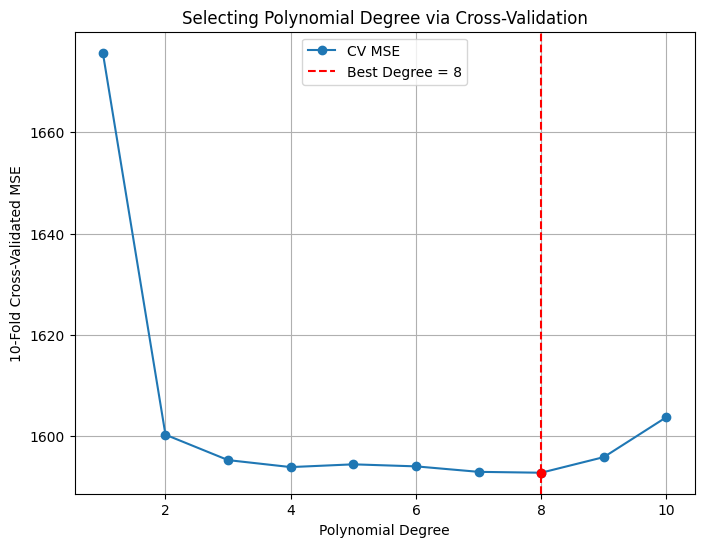

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Find the best degree
best_degree = degrees[np.argmin(cv_errors)]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(degrees, cv_errors, marker='o', label='CV MSE')
plt.axvline(x=best_degree, color='red', linestyle='--', label=f'Best Degree = {best_degree}')
plt.scatter(best_degree, min(cv_errors), color='red', zorder=5)
plt.xlabel('Polynomial Degree')
plt.ylabel('10-Fold Cross-Validated MSE')
plt.title('Selecting Polynomial Degree via Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
best_degree = degrees[np.argmin(cv_errors)]
print(f"The best polynomial degree based on cross-validated MSE is: {best_degree}")

The best polynomial degree based on cross-validated MSE is: 8


## ANOVA PART 

In [11]:
models = []
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    X_poly  = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    models.append(model)

In [12]:
models[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     92.89
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.75e-57
Time:                        20:39:43   Log-Likelihood:                -15316.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2996   BIC:                         3.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.2439     22.184     -3.392      0.001    -118.741     -31.747
x1            10.1900      1.605      6.348      0.000       7.043      13.337
x2            -0.1680      0.037     -4.559      0.000      -0.240      -0.096
x3             0.0008      0.000      3.143      0.002       0.000       0.001
==============================================================================
Omnibus:                     1096.742   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.829
Skew:                           1.720   Prob(JB):                         0.00
Kurtosis:                       8.282   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
## Step 2: Annova Analysis
annova_results = anova_lm(*models)

In [14]:
annova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.518660,2.449925e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.883629,1.683871e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.807838,5.110635e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804558,3.698061e-01
5,2993.0,4.766389e+06,1.0,3932.257499,2.466726,1.163856e-01
6,2993.0,4.764599e+06,-0.0,1790.481752,-inf,NaN
7,2993.0,4.764136e+06,-0.0,462.460746,-inf,NaN
8,2993.0,4.764981e+06,-0.0,-844.190096,inf,NaN
9,2993.0,4.771202e+06,-0.0,-6221.386832,inf,NaN


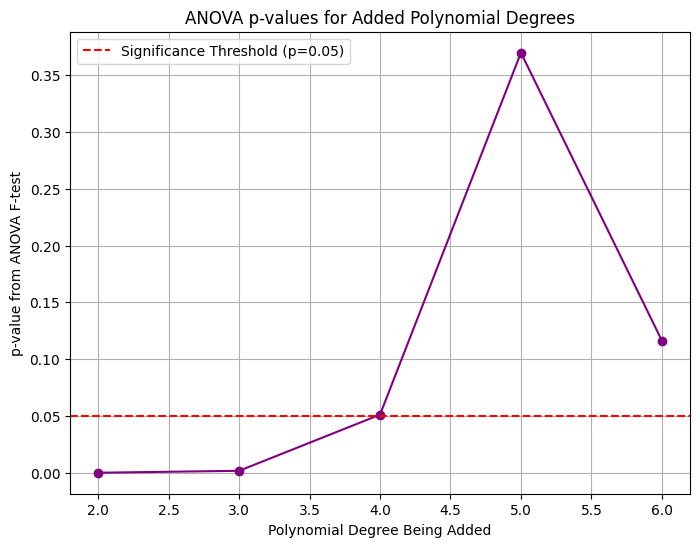

In [15]:
import matplotlib.pyplot as plt

# Extract p-values from ANOVA results
p_values = annova_results["Pr(>F)"].dropna()  # Drop NaNs for plotting
anova_degrees = range(2, 2 + len(p_values))  # Degree comparison starts from 2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(anova_degrees, p_values, marker='o', color='purple')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.xlabel('Polynomial Degree Being Added')
plt.ylabel('p-value from ANOVA F-test')
plt.title('ANOVA p-values for Added Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()


## Exercice 6: Step Function to Predict Wage 

In [16]:
X 

,age
0,18
1,24
2,45
3,43
4,50
...,...
2995,44
2996,30
2997,27
2998,27


In [17]:
X.describe()

,age
count,3000.000000
mean,42.414667
std,11.542406
min,18.000000
25%,33.750000
50%,42.000000
75%,51.000000
max,80.000000


In [18]:
cuts_range = range(2, 11)
cv_errors = []

for n_cuts in cuts_range:
    age_bins = pd.cut(X['age'], bins=n_cuts)
    X_step = pd.get_dummies(age_bins)
    
    model = LinearRegression()
    mse = -cross_val_score(model, X_step, y, scoring='neg_mean_squared_error', cv=10).mean()
    cv_errors.append(mse)

# Find optimal number of cuts
best_cuts = cuts_range[np.argmin(cv_errors)]
print("Best number of cuts:", best_cuts)


Best number of cuts: 8


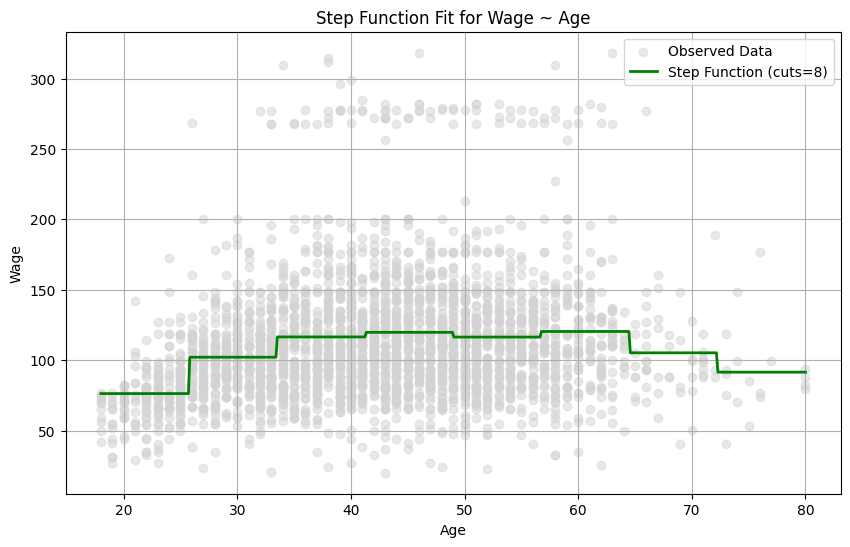

In [19]:
# Refit using the best number of cuts
age_bins = pd.cut(X['age'], bins=best_cuts)
X_step = pd.get_dummies(age_bins)
model = LinearRegression().fit(X_step, y)

# Predict on age range
age_range = np.linspace(X['age'].min(), X['age'].max(), 500)
age_bin_pred = pd.cut(age_range, bins=best_cuts)
X_pred_step = pd.get_dummies(age_bin_pred)
X_pred_step = X_pred_step.reindex(columns=X_step.columns, fill_value=0)  # align columns
wage_pred = model.predict(X_pred_step)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], y, color='lightgray', alpha=0.5, label='Observed Data')
plt.plot(age_range, wage_pred, color='green', linewidth=2, label=f'Step Function (cuts={best_cuts})')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Step Function Fit for Wage ~ Age')
plt.legend()
plt.grid(True)
plt.show()


## Exercice 9: 

In [20]:
df_boston =  load_data("Boston")

In [21]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [22]:
df_boston['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

In [23]:
df_boston['nox'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

### a) 

In [24]:
from ISLP.models import poly

In [25]:
X_boston = df_boston['dis']
y_boston = df_boston['nox']

In [26]:
X_boston.head()

0    4.0900
1    4.9671
2    4.9671
3    6.0622
4    6.0622
Name: dis, dtype: float64

In [30]:
X_boston.head()

0    4.0900
1    4.9671
2    4.9671
3    6.0622
4    6.0622
Name: dis, dtype: float64

In [31]:
poly_boston = PolynomialFeatures(degree=3, include_bias=False)
X_boston_poly = poly_boston.fit_transform(X_boston.values.reshape(-1, 1))
X_boston_poly.shape

(506, 3)

In [33]:
poly_boston

PolynomialFeatures(degree=3, include_bias=False)

In [32]:
X_boston_poly

array([[  4.09      ,  16.7281    ,  68.417929  ],
       [  4.9671    ,  24.67208241, 122.54870054],
       [  4.9671    ,  24.67208241, 122.54870054],
       ...,
       [  2.1675    ,   4.69805625,  10.18303692],
       [  2.3889    ,   5.70684321,  13.63307774],
       [  2.505     ,   6.275025  ,  15.71893762]])